In [1]:
!pip install -q transformers datasets torch torchvision perforatedai pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 106.9 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving config.json to config.json
Saving train.py to train.py


In [3]:
import json

with open('config.json', 'r') as f:
    config = json.load(f)

config['mode'] = 'baseline'
config['batch_size'] = 128
config['num_workers'] = 2
with open('config.json', 'w') as f:
    json.dump(config, indent=2, fp=f)

print("Config set to BASELINE mode:")
print(json.dumps(config, indent=2))

!python train.py

Config set to BASELINE mode:
{
  "mode": "baseline",
  "model_name": "prajjwal1/bert-tiny",
  "batch_size": 128,
  "max_len": 128,
  "lr": 2e-05,
  "weight_decay": 0.01,
  "seed": 42,
  "num_workers": 2,
  "max_epochs": 100,
  "patience": 5,
  "pai_save_name": "agnews_pai",
  "max_dendrites": 5
}
Configuration loaded:
{
  "mode": "baseline",
  "model_name": "prajjwal1/bert-tiny",
  "batch_size": 128,
  "max_len": 128,
  "lr": 2e-05,
  "weight_decay": 0.01,
  "seed": 42,
  "num_workers": 2,
  "max_epochs": 100,
  "patience": 5,
  "pai_save_name": "agnews_pai",
  "max_dendrites": 5
}

BASELINE TRAINING
Loading AG News dataset...
README.md: 8.07kB [00:00, 35.0MB/s]
data/train-00000-of-00001.parquet: 100% 18.6M/18.6M [00:01<00:00, 9.78MB/s]
data/test-00000-of-00001.parquet: 100% 1.23M/1.23M [00:00<00:00, 1.44MB/s]
Generating train split: 100% 120000/120000 [00:00<00:00, 764083.74 examples/s]
Generating test split: 100% 7600/7600 [00:00<00:00, 747314.74 examples/s]
config.json: 100% 285/285

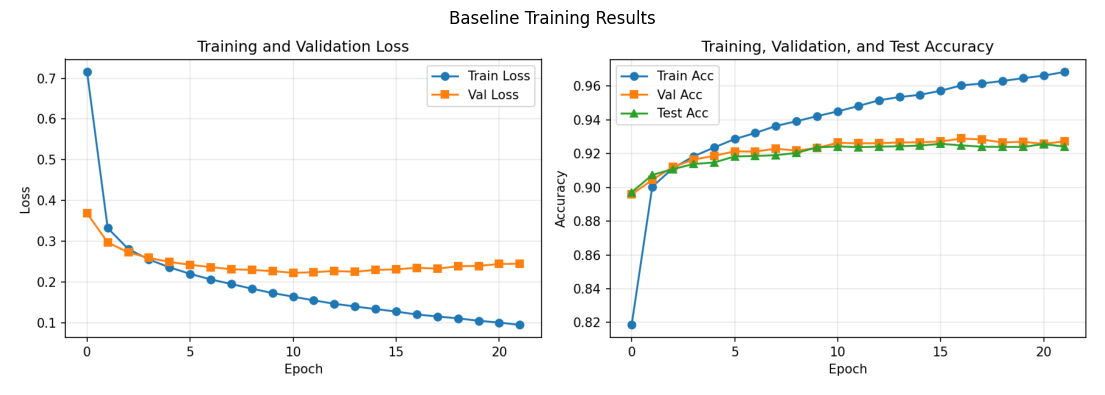

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('baseline_results.png')
plt.figure(figsize=(14, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Baseline Training Results')
plt.show()

import os
if os.path.exists('results_baseline.json'):
    with open('results_baseline.json', 'r') as f:
        results = json.load(f)
    print("\nBaseline Results:")
    print(json.dumps(results, indent=2))

In [5]:
import json
with open('config.json', 'r') as f:
    config = json.load(f)

config['mode'] = 'pai'
config['batch_size'] = 128
config['num_workers'] = 2
config['max_dendrites'] = 5

with open('config.json', 'w') as f:
    json.dump(config, indent=2, fp=f)

print("Config set to PAI mode:")
print(json.dumps(config, indent=2))
!python train.py

Config set to PAI mode:
{
  "mode": "pai",
  "model_name": "prajjwal1/bert-tiny",
  "batch_size": 128,
  "max_len": 128,
  "lr": 2e-05,
  "weight_decay": 0.01,
  "seed": 42,
  "num_workers": 2,
  "max_epochs": 100,
  "patience": 5,
  "pai_save_name": "agnews_pai",
  "max_dendrites": 5
}
Configuration loaded:
{
  "mode": "pai",
  "model_name": "prajjwal1/bert-tiny",
  "batch_size": 128,
  "max_len": 128,
  "lr": 2e-05,
  "weight_decay": 0.01,
  "seed": 42,
  "num_workers": 2,
  "max_epochs": 100,
  "patience": 5,
  "pai_save_name": "agnews_pai",
  "max_dendrites": 5
}
Building dendrites without Perforated Backpropagation

PAI TRAINING
Loading AG News dataset...
Map: 100% 108000/108000 [00:13<00:00, 7728.85 examples/s]
Map: 100% 12000/12000 [00:01<00:00, 7516.58 examples/s]
Map: 100% 7600/7600 [00:00<00:00, 10302.95 examples/s]
Train: 108000, Val: 12000, Test: 7600
2025-10-14 18:11:35.005072: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly differ

Found 5 PAI graphs:

Displaying: agnews_pai.png


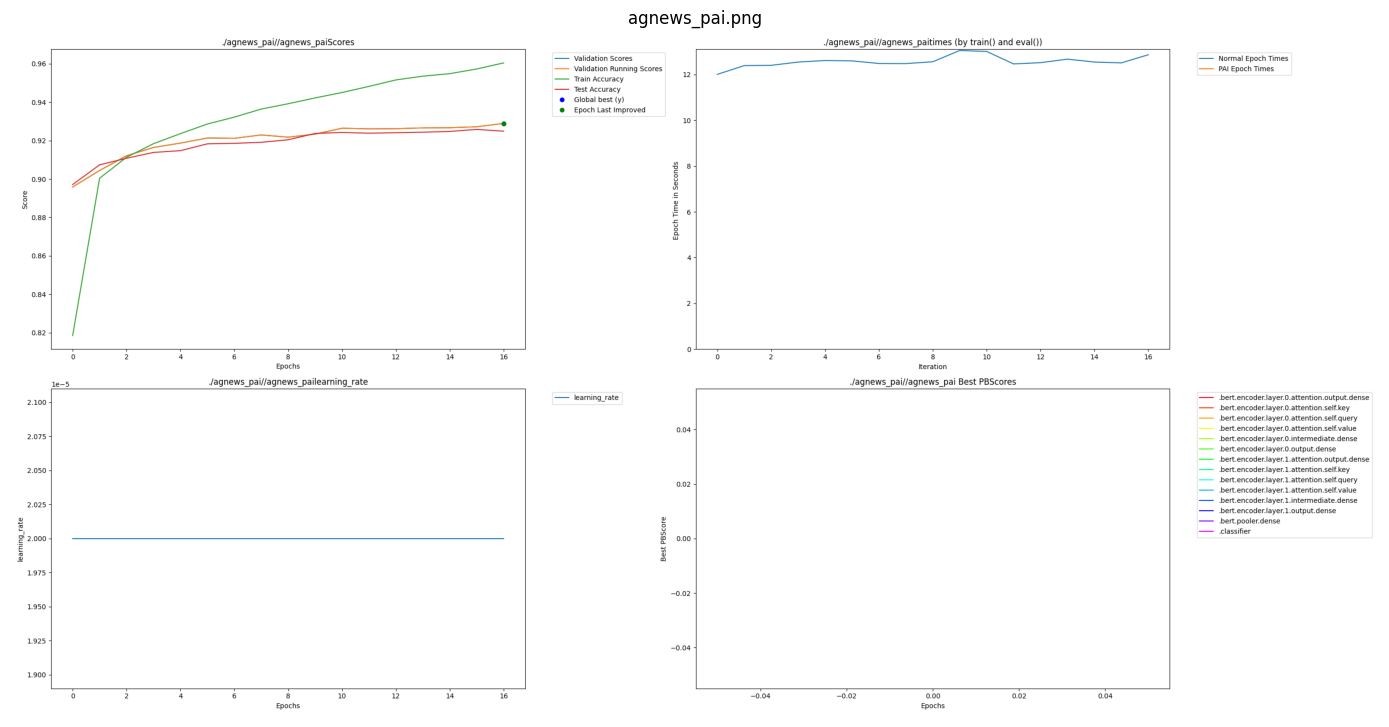



Displaying: agnews_pai_14.10.2025.18.23.24_noImprove_lr_0.png


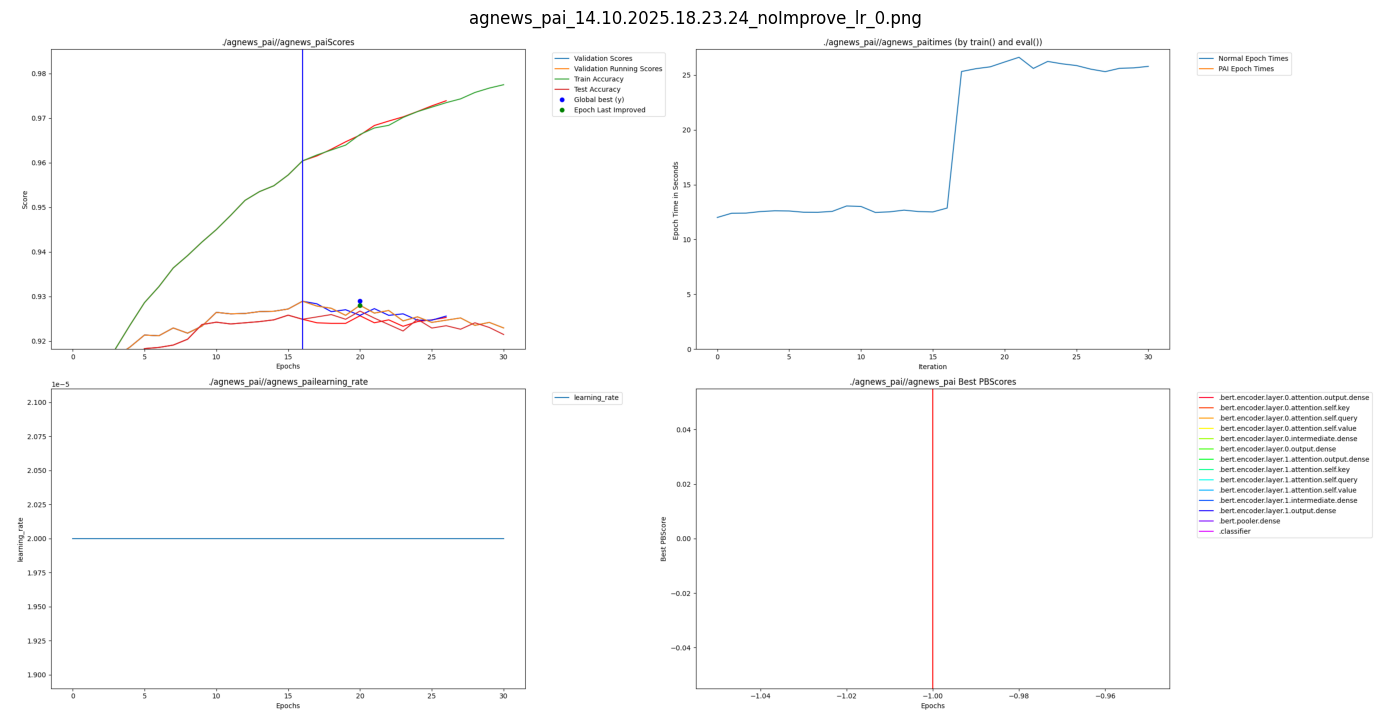



Displaying: agnews_pai_14.10.2025.18.28.08_noImprove_lr_0.png


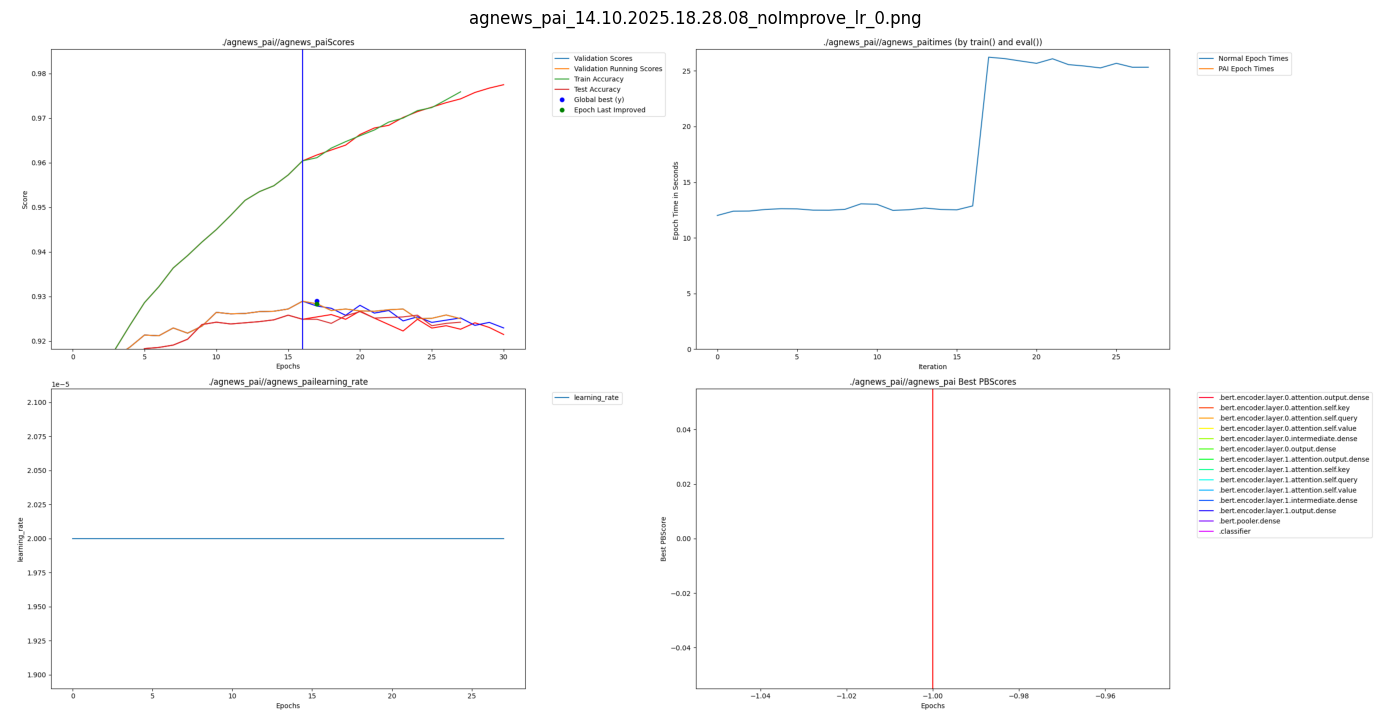



Displaying: agnews_pai_14.10.2025.18.32.50_noImprove_lr_0.png


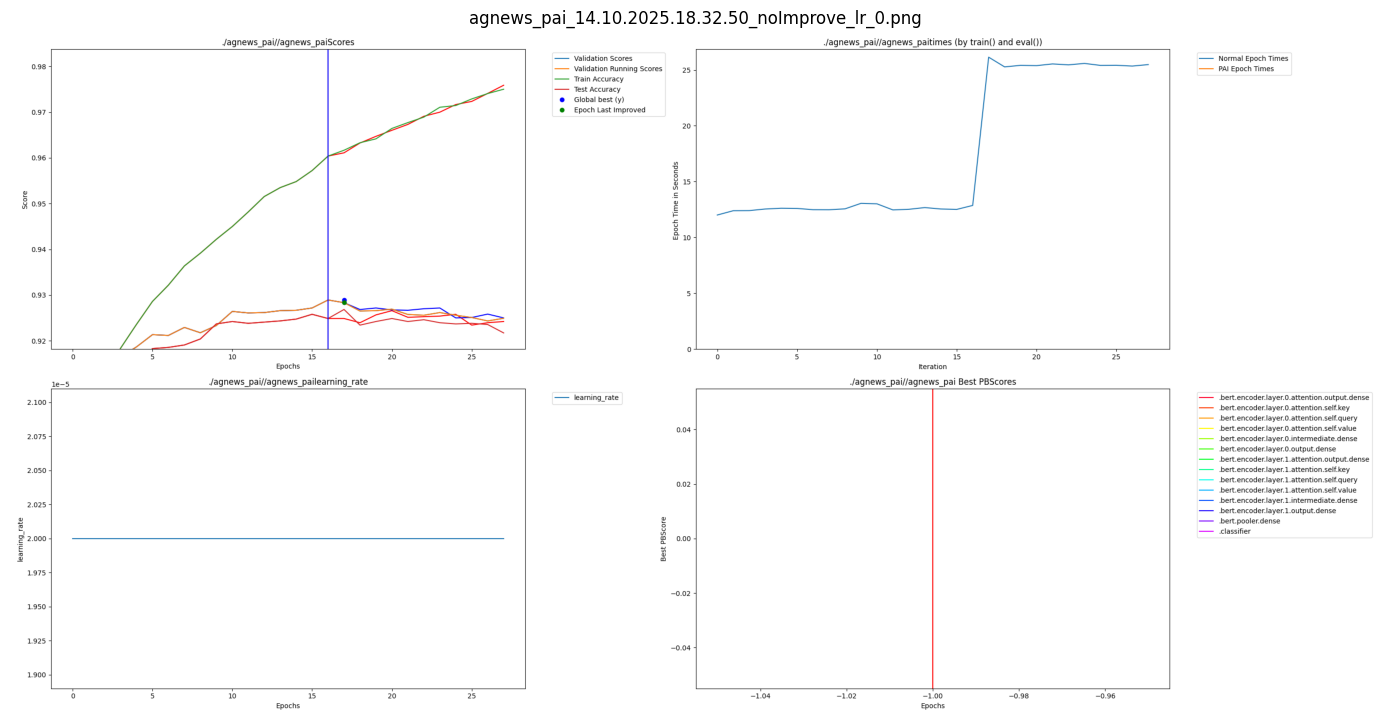



Displaying: agnews_pai_beforeSwitch_0.png


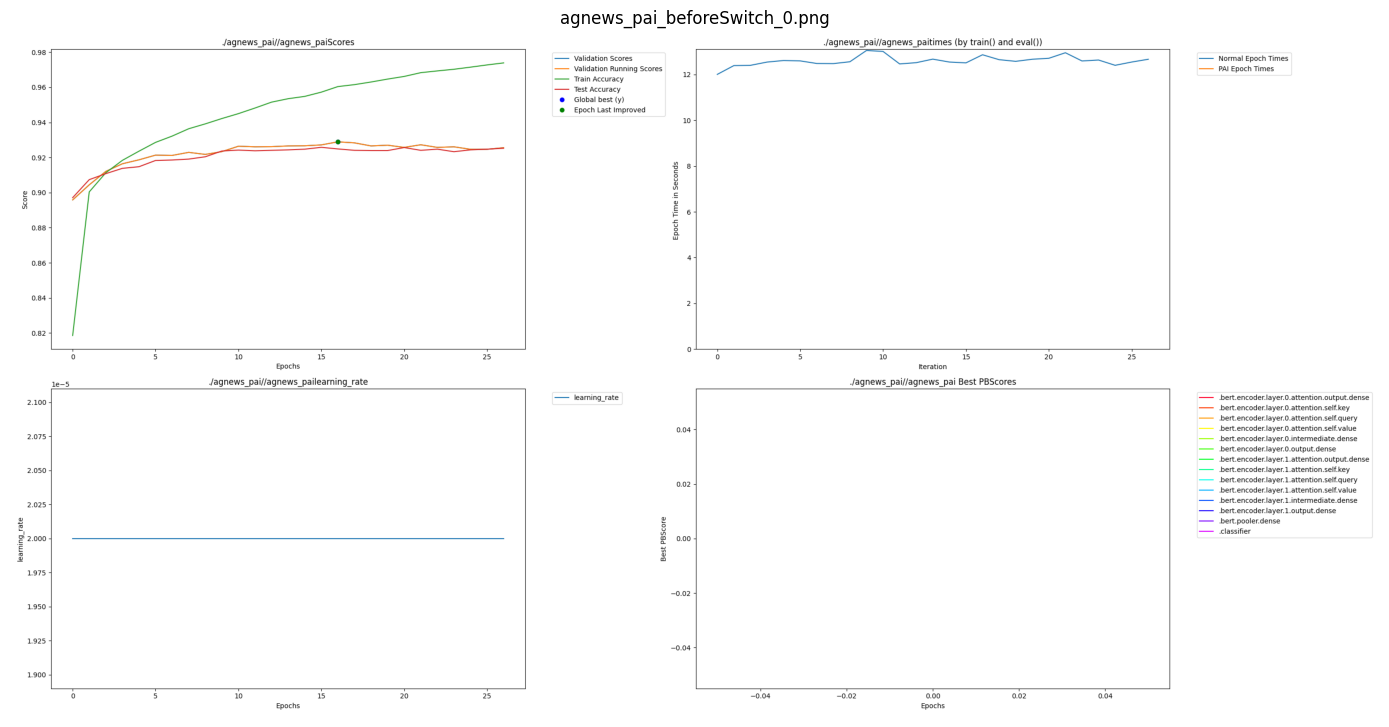

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

pai_folder = 'agnews_pai'
png_files = sorted(glob.glob(f"{pai_folder}/*.png"))

if png_files:
    print(f"Found {len(png_files)} PAI graphs:\n")
    for png_file in png_files:
        print(f"Displaying: {os.path.basename(png_file)}")
        img = Image.open(png_file)
        plt.figure(figsize=(14, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(png_file))
        plt.tight_layout()
        plt.show()
        print("\n" + "="*60 + "\n")
else:
    print(f"No graphs found in {pai_folder}/")